In [1]:
#==============================================================================
# Import libraries
#==============================================================================
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd



In [2]:
#==============================================================================
# imort the dataset of Home Buyers prices
#==============================================================================

flatdata = pd.read_csv ('HomeBuyer.csv')
X = flatdata.iloc [:,[0,1]].values
y = flatdata.iloc [:,2].values

In [3]:
#==============================================================================
# split the dataset into training and test set. We will use 75/25 approach
#==============================================================================

from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split (X, y, test_size = 1/4, 
                                                     random_state = 0)

C:\Users\armando_galeana\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [4]:
#==============================================================================
# Feature scalling 
#==============================================================================

from sklearn.preprocessing import StandardScaler
independent_scalar = StandardScaler()
X_train = independent_scalar.fit_transform (X_train) #fit and transform
X_test = independent_scalar.transform (X_test) # only transform

C:\Users\armando_galeana\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\utils\validation.py:429: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, _DataConversionWarning)


In [5]:
#==============================================================================
# Fit the Logistic regression to the train data. Logistic regression is a 
# linear classifier after which the data is divided by a straight line.
#==============================================================================
from sklearn.linear_model import LogisticRegression
LRClassifier = LogisticRegression (random_state = 0)
LRClassifier.fit (X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=0, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [6]:
#==============================================================================
# Predict the values 
#==============================================================================

prediction = LRClassifier.predict (X_test)


In [7]:
#==============================================================================
# Create confusion matrix to evaluate performance of data
#==============================================================================
from sklearn.metrics import confusion_matrix
confusionMatrix = confusion_matrix (y_test, prediction)

print(confusionMatrix)



[[65  3]
 [ 8 24]]


In [8]:
#==============================================================================
# let us visualize it
#==============================================================================
    
xx, yy = np.mgrid[-5:5:.01, -5:5:.01]
grid = np.c_[xx.ravel(), yy.ravel()]
probs = LRClassifier.predict_proba(grid)[:, 1].reshape(xx.shape)

print(probs)

f, ax = plt.subplots(figsize=(8, 6))
contour = ax.contourf(xx, yy, probs, 25, cmap="RdBu",
                      vmin=0, vmax=1)
ax_c = f.colorbar(contour)
ax_c.set_label("$P(y = 1)$")
ax_c.set_ticks([0, .25, .5, .75, 1])

ax.scatter(X_test[:, 0], X_test[:, 1],c = (y_test == 1 ), s=50,
           cmap="RdBu", vmin=-.2, vmax=1.2,
           edgecolor="white", linewidth=1)

ax.set(aspect="equal",
       xlim=(-5, 5), ylim=(-5, 5),
       xlabel="$X_1$", ylabel="$X_2$")

[[  5.31793363e-08   5.37693571e-08   5.43659241e-08 ...,   3.17626301e-03
    3.21139025e-03   3.24690469e-03]
 [  5.42871110e-08   5.48894224e-08   5.54984164e-08 ...,   3.24221299e-03
    3.27806718e-03   3.31431655e-03]
 [  5.54179616e-08   5.60328197e-08   5.66544997e-08 ...,   3.30952776e-03
    3.34612386e-03   3.38312326e-03]
 ..., 
 [  9.78235714e-01   9.78469395e-01   9.78700622e-01 ...,   9.99999629e-01
    9.99999633e-01   9.99999637e-01]
 [  9.78670360e-01   9.78899475e-01   9.79126182e-01 ...,   9.99999636e-01
    9.99999640e-01   9.99999644e-01]
 [  9.79096511e-01   9.79321145e-01   9.79543416e-01 ...,   9.99999644e-01
    9.99999648e-01   9.99999651e-01]]


[(-5, 5),
 (-5, 5),
 None]

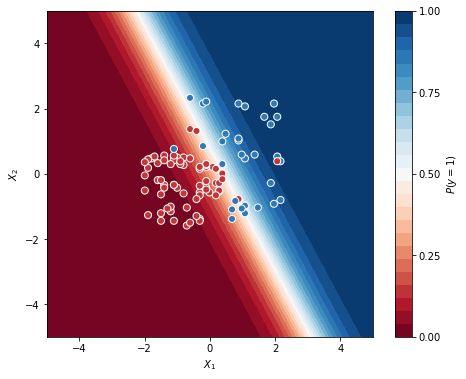

In [9]:
#==============================================================================
# So now let us visualize the Test set
#==============================================================================
plt.show()